# 1-Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

# 2-Normalization

In [2]:
class Normalization():
    def __init__(self, data):
        self.min = data.min(axis=0)
        self.max = data.max(axis=0)
        self.data = data
        
    def transform(self, d):
        return (d - self.min) / (self.max - self.min)
    
    def inversed_transform(self, d):
        return (d * (self.max - self.min)) + self.min
        

# 3-Model

In [4]:
class LinearRegression():
    def __init__(self, x1_train, x2_train, y_train, w_in1=0, w_in2=0, b_in=0, alpha=0.3, epoch=3000):
        self.x1_train = x1_train
        self.x2_train = x2_train
        self.y_train = y_train
        self.w_in1 = w_in1
        self.w_in2 = w_in2
        self.b_in = b_in
        self.alpha = alpha
        self.epoch = epoch
        self.cost_list = list()
    
    def fit(self):
        self.gradient_descent(self.w_in1, self.w_in2, self.b_in, self.x1_train, self.x2_train, self.y_train, self.alpha, self.epoch)
        return self.b, self.w1, self.w2
    
    
    def gradient_descent(self,w1,w2, b, x1,x2, y, alpha, iter_num):
        
        for i in range(iter_num):
            f = (w1*x1) + (w2*x2) + b
            
            dw1 = ((f-y)*x1).sum()/len(x1)
            dw2 = ((f-y)*x2).sum()/len(x2)
            db = sum_b = (f-y).sum()/len(x1)
            
            w1 = w1 - alpha * dw1
            w2 = w2 - alpha * dw2
            b = b - alpha * db
            cost = np.power((w1*x1 + w2*x2 + b) -y,2).mean()
            self.cost_list.append(cost)
            if(i % 1000 == 0):
                print(f'Epoch:{i} -> cost={cost}')
             
        self.b = b
        self.w1 = w1
        self.w2 = w2
        return b,w1,w2
        
    def draw_plot(self):
        plt.scatter(self.x_train, self.y_train,  color='blue')
        plt.plot(self.x_train, self.w * self.x_train + self.b, '-r')
        print(f'b:{self.b}\nw:{self.w}')
        
    def mse(self):
        y_pred = self.w1*self.x1_train + self.w2*self.x2_train + self.b
        self.mse = mean_squared_error(y_pred, self.y_train)
        print("MSE of train set is : ",self.mse)
        
    def predict(self,test1,test2):
        pred = self.w1*test1 + self.w2*test2 + self.b
        return pred
        
    def validation(self,cv_x1,cv_x2,cv_y):
        validation = self.w1*cv_x1 + self.w2*cv_x2 + self.b
        print("MSE of validation is : ",mean_squared_error(validation, cv_y))

    def draw_cost(self):
        plt.plot(range(len(self.cost_list)), self.cost_list ,color='red')
        
    

# 4-Dataset

In [5]:
df = pd.read_csv('train.csv')
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,29495,2013,73121,Oklahoma City,OK,1GNSKBE01DR127341,Chevrolet,TahoeLT
1,35969,2016,31800,Conyers,GA,1C4BJWDGXGL119960,Jeep,Wrangler
2,21477,2016,40655,Elk Grove Village,IL,2G1145S39G9149688,Chevrolet,ImpalaLTZ
3,13889,2015,41646,Marysville,WA,1G1PE5SB5F7250712,Chevrolet,Cruze2LT
4,14225,2016,33535,Toledo,OH,1N4AL3AP2GC197633,Nissan,Altima2.5
...,...,...,...,...,...,...,...,...
99995,12988,2007,26126,Jacksonville,AR,1G6KD57Y67U183321,Cadillac,DTS4dr
99996,22700,2017,11011,Pikeville,KY,KNDPMCACXH7165487,Kia,SportageAWD
99997,6988,1998,112086,Garland,TX,WBSBK0337WEC38590,BMW,3
99998,23777,2012,97638,Mesa,AZ,1FTEX1EM1CFC37875,Ford,F-1504WD


In [6]:
# Removing Outliers
df = df.sort_values(by='Mileage')[:-4]

In [7]:
# Feature engineering
df['MPY'] = df['Mileage']/(2022 - df['Year'])
MPY_n = Normalization(df[['MPY']])
year_n = Normalization(df[['Year']])
Mileage_n = Normalization(df[['Mileage']])

df['MPYn'] = MPY_n.transform(df[['MPY']])
df['Yearn'] = year_n.transform(df[['Year']])
df['Mileagen'] = Mileage_n.transform(df[['Mileage']])
df

,Price,Year,Mileage,City,State,Vin,Make,Model,MPY,MPYn,Yearn,Mileagen
45468,33515,2017,5,Dublin,CA,3GCPCREC7HG216366,Chevrolet,Silverado,1.000000,0.000007,0.952381,0.000000
95613,53197,2016,5,Denton,MD,1FD0W4GT4GED30982,Ford,Super,0.833333,0.000005,0.904762,0.000000
77262,37988,2017,5,DANBURY,CT,WDDSJ4GBXHN499530,Mercedes-Benz,CLACLA,1.000000,0.000007,0.952381,0.000000
62380,34593,2017,5,Johnston,RI,KL4CJHSB7HB067440,Buick,EncoreAWD,1.000000,0.000007,0.952381,0.000000
27242,18995,2016,5,Houston,TX,KMHTC6AE1GU295089,Hyundai,VelosterAutomatic,0.833333,0.000005,0.904762,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
95625,14488,2014,389781,Raleigh,NC,2HGFB2F50EH519721,Honda,Civic,48722.625000,0.786786,0.809524,0.668195
62496,12768,2012,409065,Jersey City,NJ,1HGCP2F78CA007271,Honda,Accord,40906.500000,0.660568,0.714286,0.701253
6222,2900,2000,409532,Marietta,GA,1GKEK13T5YJ113304,GMC,Yukon4dr,18615.090909,0.300596,0.142857,0.702054
93539,7998,2005,448409,Fox Lake,IL,1GCHG35U751116700,Chevrolet,Express,26377.000000,0.425939,0.380952,0.768701


In [8]:
# Split Train/Validation
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
cv = df[~msk]

## 5-Run

In [9]:
x1_train = np.asanyarray(train[['MPYn']])
x2_train = np.asanyarray(train[['Mileagen']])
y_train = np.asanyarray(train[['Price']])

x1_cv = np.asanyarray(cv[['MPYn']])
x2_cv = np.asanyarray(cv[['Mileagen']])
y_cv = np.asanyarray(cv[['Price']])

model = LinearRegression(x1_train, x2_train, y_train, w_in1=0, w_in2=0 , b_in=0, alpha=0.3, epoch=10000)
model.fit()
# model.draw_plot()
model.mse()
model.validation(x1_cv, x2_cv, y_cv)

Epoch:0 -> cost=401056705.6306521
Epoch:1000 -> cost=146484295.62462145
Epoch:2000 -> cost=145639222.16745177
Epoch:3000 -> cost=145435265.69073337
Epoch:4000 -> cost=145289566.60860327
Epoch:5000 -> cost=145180323.97179323
Epoch:6000 -> cost=145098322.48309678
Epoch:7000 -> cost=145036767.58325404
Epoch:8000 -> cost=144990561.0079892
Epoch:9000 -> cost=144955875.74926236
MSE of train set is :  144929861.5242536
MSE of validation is :  146301562.56069458


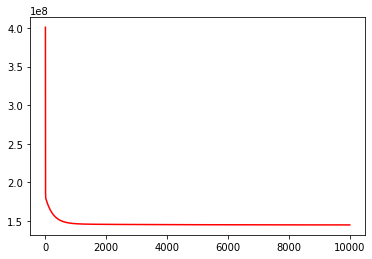

In [10]:
model.draw_cost()

# 6-Prediction

In [11]:
test = pd.read_csv('test.csv')
test['MPY'] = test['Mileage']/(2022 - test['Year'])

x1 = np.asanyarray(MPY_n.transform(test[['MPY']]))
x2 = np.asanyarray(Mileage_n.transform(test[['Mileage']]))

test['Price'] = model.predict(x1,x2)
test[['CarId','Price']]
# test[['CarId','Price']].to_csv('pre.csv',index=False)

,CarId,Price
0,0,18539.913745
1,1,28026.935475
2,2,22881.051891
3,3,25940.870598
4,4,25574.945668
...,...,...
49995,49995,17998.881399
49996,49996,16880.197439
49997,49997,24918.022052
49998,49998,28521.756100
